SaleData Overview:
   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television   95.0      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater   50.0       500.0   
2 2018-02-09  Central  Hermann       Luis    Television   36.0      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone   27.0       225.0   
4 2018-03-15     West  Timothy    Stephen    Television   56.0      1198.0   

   Sale_amt  
0  113810.0  
1   25000.0  
2   43128.0  
3    6075.0  
4   67088.0  

Summary Statistics:
            Units   Unit_price       Sale_amt
count   45.000000    45.000000      45.000000
mean    54.083333   583.313889   30578.761111
std     45.096676   444.806622   32227.534943
min      2.000000    58.500000     250.000000
25%     28.000000   225.000000    4329.000000
50%     53.000000   500.000000   17100.000000
75%     75.000000  1198.000000   43128.000000
max    278.000000  1198.000000  113810.

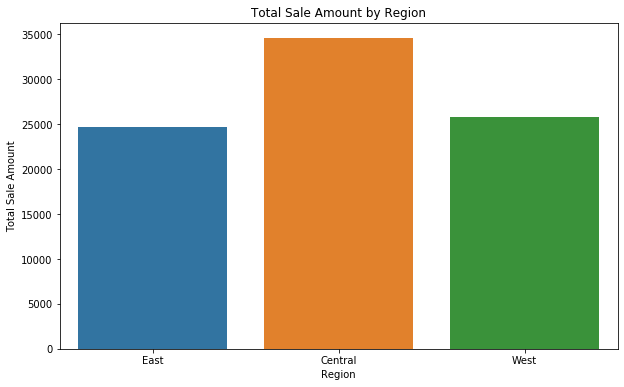

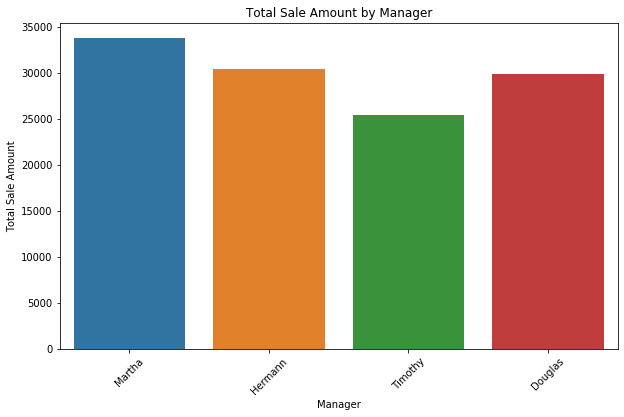

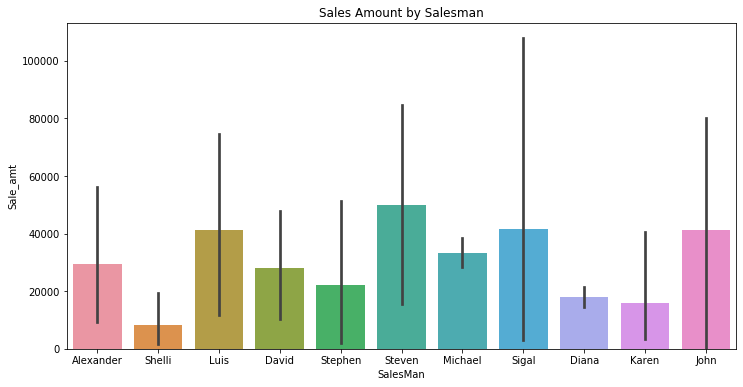

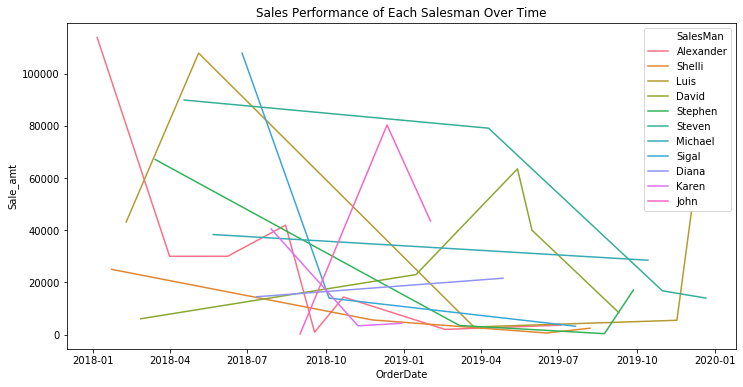


Top 5 Salesmen Data:
 SalesMan Manager  Region  Sale_amt
Alexander  Martha    East  236703.0
    David Timothy Central  140955.0
     Luis Hermann Central  206373.0
    Sigal Hermann Central  125037.5
   Steven  Martha Central  199690.0


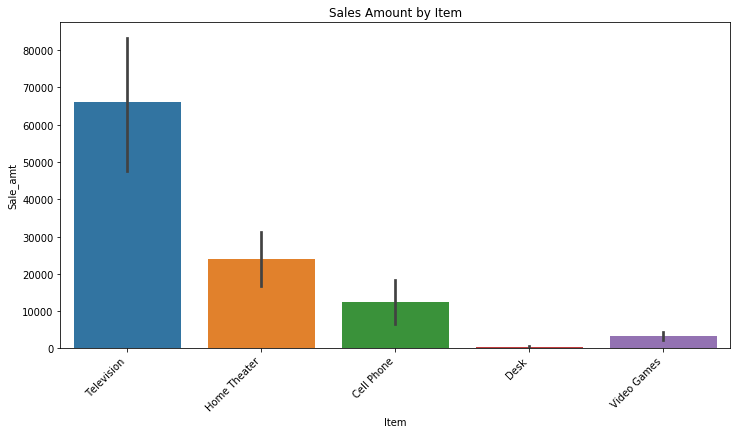

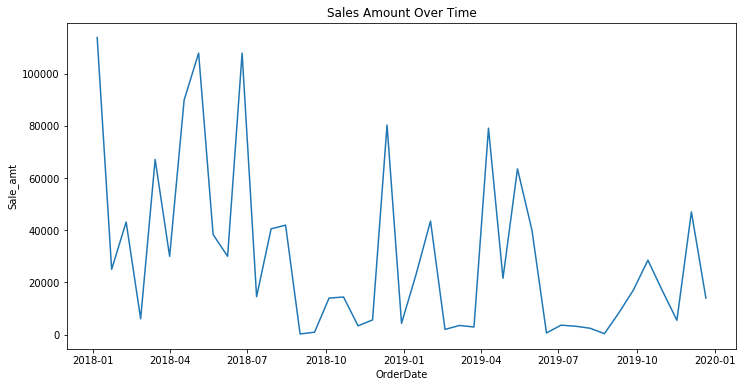

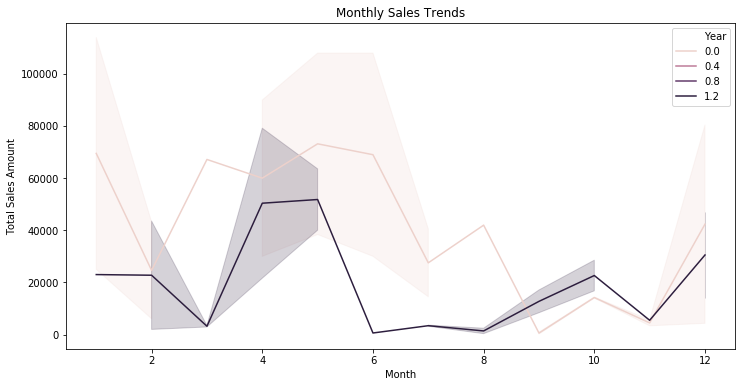

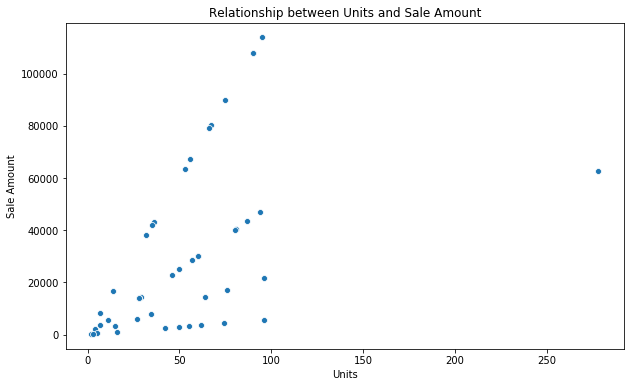

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# file path
excel_file_path = 'SaleData.xlsx'

# Load the SaleData from excel
df = pd.read_excel(excel_file_path)

# Display the first few rows of the SaleData
print("SaleData Overview:")
print(df.head())

# Basic statistics about numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Insights about sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sale_amt', data=df, ci=None)
plt.title('Total Sale Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Sale Amount')
plt.show()

# Insights about sales by manager
plt.figure(figsize=(10, 6))
sns.barplot(x='Manager', y='Sale_amt', data=df, ci=None)
plt.title('Total Sale Amount by Manager')
plt.xlabel('Manager')
plt.ylabel('Total Sale Amount')
plt.xticks(rotation=45)
plt.show()

# Insights about sales by Salesman
plt.figure(figsize=(12, 6))
sns.barplot(x='SalesMan', y='Sale_amt', data=df)
plt.title('Sales Amount by Salesman')
plt.show()

# Sales performance of each salesman over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='OrderDate', y='Sale_amt', hue='SalesMan', data=df)
plt.title('Sales Performance of Each Salesman Over Time')
plt.show()

# top N salesmen
top_n = 5
top_salesmen = df.groupby('SalesMan')['Sale_amt'].sum().nlargest(top_n)

top_salesmen_data = df[df['SalesMan'].isin(top_salesmen.index)]
top_salesmen_table = top_salesmen_data.groupby(['SalesMan', 'Manager', 'Region'])['Sale_amt'].sum().reset_index()

print(f"\nTop {top_n} Salesmen Data:")
print(top_salesmen_table.to_string(index=False))

# sales amount by item
plt.figure(figsize=(12, 6))
sns.barplot(x='Item', y='Sale_amt', data=df)
plt.title('Sales Amount by Item')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# sales amount over time
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Month'] = df['OrderDate'].dt.month
df['Year'] = df['OrderDate'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(x='OrderDate', y='Sale_amt', data=df)
plt.title('Sales Amount Over Time')
plt.show()

# Monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sale_amt', hue='Year', data=df)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()


# Relationship between Units and Sale Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units', y='Sale_amt', data=df)
plt.title('Relationship between Units and Sale Amount')
plt.xlabel('Units')
plt.ylabel('Sale Amount')
plt.show()
